In [45]:
import matplotlib
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.widgets import CheckButtons
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import pandas as pd
import scipy.stats as s_stats
import seaborn as sns

In [2]:
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind', 
              font='sans-serif', font_scale=1, color_codes=True, rc=None) 
palette = sns.color_palette("colorblind")

In [3]:
launch_data = pd.read_csv('G53FJ_10Feb24.csv')
launch_data['t'] = pd.to_numeric(launch_data['t'], errors='coerce')
launch_data['t'] = launch_data['t'] - 580715
print(launch_data['t'])
launch_data.to_csv('shifted_time.csv', index=False)
launch_data['BA'] = launch_data['BA'] - 91
launch_data.to_csv('shifted_time_alt.csv', index=False)

0           0
1          25
2          46
3          71
4          91
        ...  
3069    63706
3070    63726
3071    63746
3072    63766
3073    63911
Name: t, Length: 3074, dtype: int64


In [4]:
filter_launch_data = pd.read_csv('../data/two-step-filtering/twostepresults.csv')
filter_launch_data['a_earth'] = filter_launch_data['a_earth'] * 9.81

In [5]:
filter_launch_data2 = pd.read_csv('../data/two-step-filtering/twostepresults2.csv')
filter_launch_data2['a_earth'] = filter_launch_data2['a_earth'] * 9.81

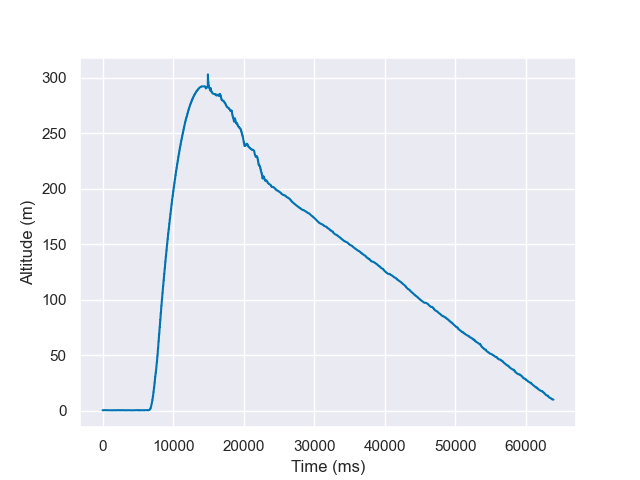

In [6]:
fig = plt.figure()
plt.plot(launch_data['t'], launch_data['BA'])
plt.xlabel('Time (ms)')
plt.ylabel('Altitude (m)')
plt.show()

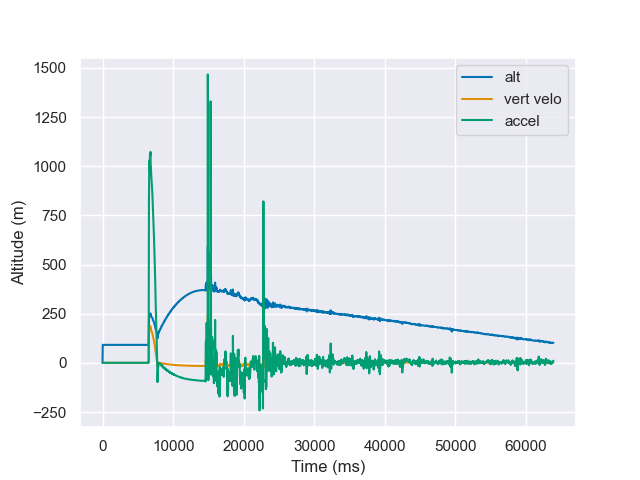

In [7]:
fig = plt.figure()
plt.plot(launch_data['t'], filter_launch_data2['h'], label="alt")
plt.plot(launch_data['t'], filter_launch_data2['v'], label="vert velo")
plt.plot(launch_data['t'], filter_launch_data2['a_earth'], label="accel")
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Altitude (m)')
plt.show()


In [67]:
cpplaunch_data = pd.read_csv('output.csv')
shift = pd.read_csv('shifted_time_alt.csv')

C:\Users\danie\AppData\Local\Temp\ipykernel_2216\2467943863.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Set3')


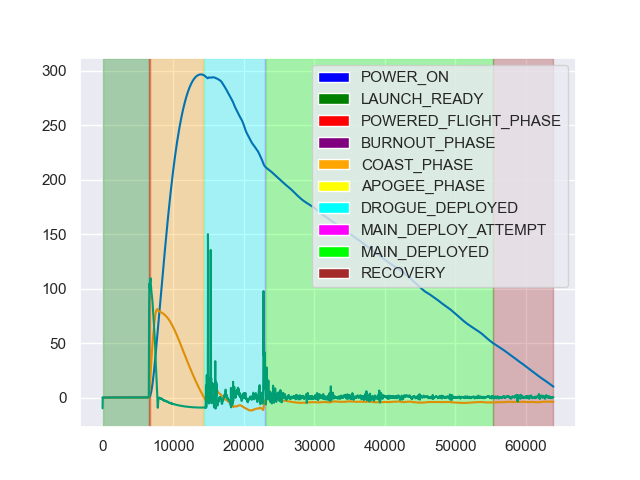

In [68]:
x = cpplaunch_data['Time (ms)']
y = cpplaunch_data['Altitude']
category  = cpplaunch_data['State']

# Map states to colors
state_colors = {
    'POWER_ON': 'blue',
    'LAUNCH_READY': 'green',
    'POWERED_FLIGHT_PHASE': 'red',
    'BURNOUT_PHASE': 'purple',
    'COAST_PHASE': 'orange',
    'APOGEE_PHASE': 'yellow',
    'DROGUE_DEPLOYED': 'cyan',
    'MAIN_DEPLOY_ATTEMPT': 'magenta',
    'MAIN_DEPLOYED': 'lime',
    'RECOVERY': 'brown'
}

# Plot the data
fig, ax = plt.subplots()
ax.plot(cpplaunch_data['Time (ms)'], cpplaunch_data['Altitude'])
plt.plot(launch_data['t'], cpplaunch_data['Vertical Velocity'], label="vert velo")
plt.plot(launch_data['t'], cpplaunch_data['Vertical Acceleration'], label="accel")

cmap = matplotlib.cm.get_cmap('Set3')
for state, color in state_colors.items():
    bounds = cpplaunch_data.loc[cpplaunch_data['State'] == state, 'Time (ms)']
    ax.axvspan(bounds.min(), bounds.max()+1, alpha=0.3, color=color)

# Create legend
legend = [Patch(facecolor=color, label=state) for state, color in state_colors.items()]
ax.legend(handles=legend)


plt.show()

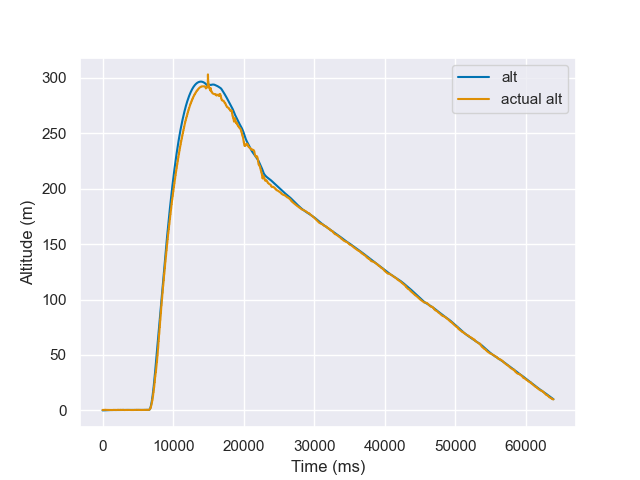

In [54]:
fig = plt.figure()
plt.plot(cpplaunch_data['Time (ms)'], cpplaunch_data['Altitude'], label="alt")
# plt.plot(launch_data['t'], cpplaunch_data['Vertical Velocity'], label="vert velo")
# plt.plot(launch_data['t'], cpplaunch_data['Vertical Acceleration'], label="accel")

plt.plot(shift['t'], launch_data['BA'], label="actual alt")
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Altitude (m)')
plt.show()


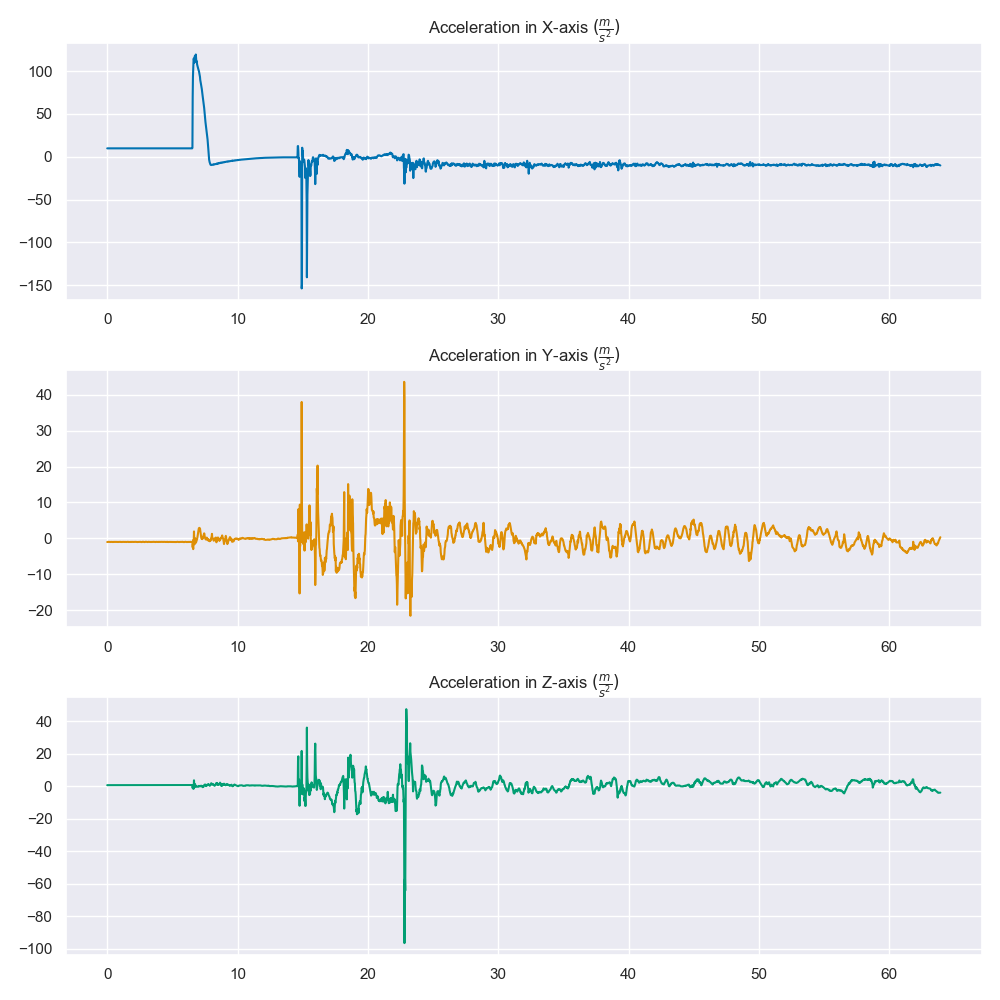

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot data on each subplot
axs[0].plot(launch_data['t']/1000, launch_data['AX'], label="Acceleration X")
axs[0].set_title(r'Acceleration in X-axis $(\frac{m}{s^2})$')
axs[1].plot(launch_data['t']/1000, launch_data['AY'], label="Acceleration Y", color=palette[1])
axs[1].set_title(r'Acceleration in Y-axis $(\frac{m}{s^2})$')
axs[2].plot(launch_data['t']/1000, launch_data['AZ'], label="Acceleration Z", color=palette[2])
axs[2].set_title(r'Acceleration in Z-axis $(\frac{m}{s^2})$')


plt.tight_layout()
plt.show()


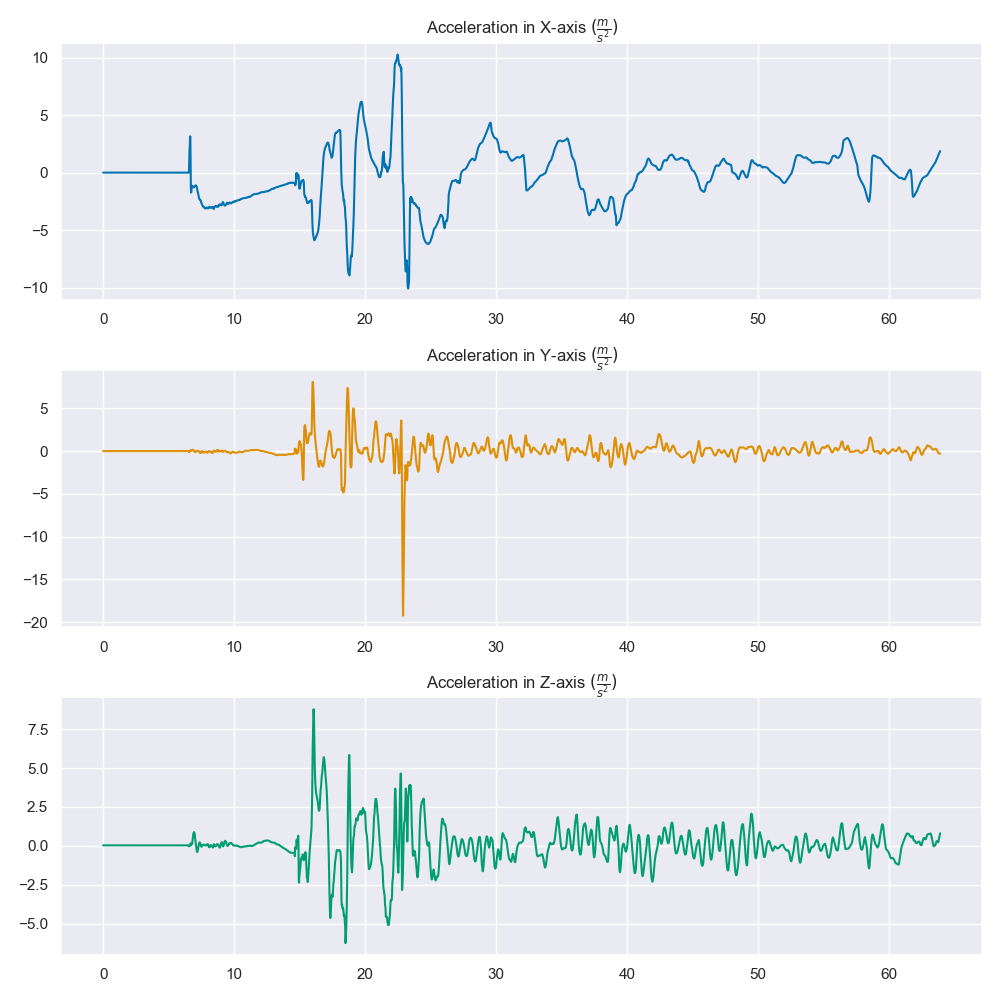

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot data on each subplot
axs[0].plot(launch_data['t']/1000, launch_data['GX'], label="Acceleration X")
axs[0].set_title(r'Acceleration in X-axis $(\frac{m}{s^2})$')
axs[1].plot(launch_data['t']/1000, launch_data['GY'], label="Acceleration Y", color=palette[1])
axs[1].set_title(r'Acceleration in Y-axis $(\frac{m}{s^2})$')
axs[2].plot(launch_data['t']/1000, launch_data['GZ'], label="Acceleration Z", color=palette[2])
axs[2].set_title(r'Acceleration in Z-axis $(\frac{m}{s^2})$')


plt.tight_layout()
plt.show()

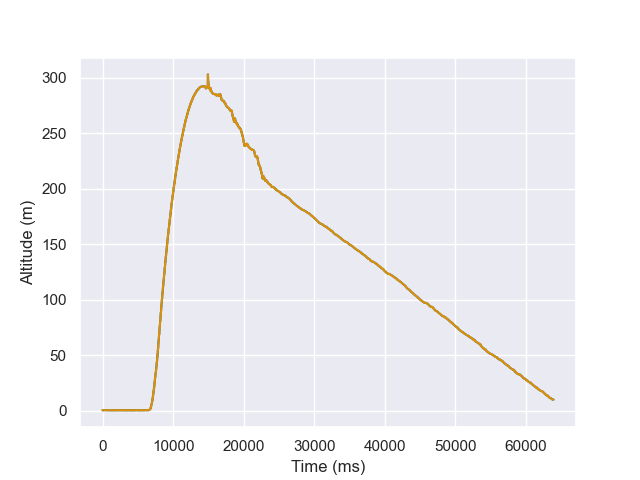

In [12]:
fig = plt.figure()
plt.plot(launch_data['t'], launch_data['BA'])
plt.plot(launch_data['t'], launch_data['BA'])
plt.xlabel('Time (ms)')
plt.ylabel('Altitude (m)')
plt.show()
